In [1]:
import pandas as pd
import numpy as np

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt
import seaborn as sns
from fitter import Fitter, get_common_distributions, get_distributions


In [27]:
pip install featurewiz

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
deepchecks 0.10.0 requires ipython<8,>=7.15.0; python_version >= "3.8", but you have ipython 8.7.0 which is incompatible.



  Created wheel for feather-format: filename=feather_format-0.4.1-py3-none-any.whl size=2457 sha256=ade2a4e88b77aa4e5a15be0d81e3eaee6511f36e89f14d7952ccdcb2f2ace77d
  Stored in directory: c:\users\udaya\appdata\local\pip\cache\wheels\e3\dc\eb\3a9468e9322c8284d7a53eab23e7a4bab6f271fff7a5871e2f
Successfully built feather-format
  Attempting uninstall: joblib
    Found existing installation: joblib 1.1.0
    Uninstalling joblib-1.1.0:
      Successfully uninstalled joblib-1.1.0


In [28]:
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 
from sklearn.ensemble import RandomForestClassifier 
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import accuracy_score 
from featurewiz import featurewiz

Imported 0.2.04 version. Select nrows to a small number when running on huge datasets.
output = featurewiz(dataname, target, corr_limit=0.90, verbose=2, sep=',', 
		header=0, test_data='',feature_engg='', category_encoders='',
		dask_xgboost_flag=False, nrows=None, skip_sulov=False)
Create new features via 'feature_engg' flag : ['interactions','groupby','target']



In [2]:
fraud_db = call_df = pd.read_csv("C:/Users/Udaya/Desktop/DSC3263/fraud.csv", low_memory=False)

In [3]:
pd.set_option('display.max_columns', None)
fraud_db.head(10)

,fraud_bool,income,name_email_similarity,prev_address_months_count,current_address_months_count,customer_age,days_since_request,intended_balcon_amount,payment_type,zip_count_4w,velocity_6h,velocity_24h,velocity_4w,bank_branch_count_8w,date_of_birth_distinct_emails_4w,employment_status,credit_risk_score,email_is_free,housing_status,phone_home_valid,phone_mobile_valid,bank_months_count,has_other_cards,proposed_credit_limit,foreign_request,source,session_length_in_minutes,device_os,keep_alive_session,device_distinct_emails_8w,device_fraud_count,month
0,1,0.9,0.166828,-1,88,50,0.020925,-1.331345,AA,769,10650.765523,3134.319630,3863.647740,1,6,CA,185,0,BA,1,0,24,0,500.0,0,INTERNET,3.888115,windows,0,1,0,7
1,1,0.9,0.296286,-1,144,50,0.005418,-0.816224,AB,366,534.047319,2670.918292,3124.298166,718,3,CA,259,1,BA,0,0,15,0,1500.0,0,INTERNET,31.798819,windows,0,1,0,7
2,1,0.9,0.044985,-1,132,40,3.108549,-0.755728,AC,870,4048.534263,2893.621498,3159.590679,1,14,CB,177,1,BA,0,1,-1,0,200.0,0,INTERNET,4.728705,other,0,1,0,7
3,1,0.9,0.159511,-1,22,50,0.019079,-1.205124,AB,810,3457.064063,4054.908412,3022.261812,1921,6,CA,110,1,BA,0,1,31,1,200.0,0,INTERNET,2.047904,linux,0,1,0,7
4,1,0.9,0.596414,-1,218,50,0.004441,-0.773276,AB,890,5020.341679,2728.237159,3087.670952,1990,2,CA,295,1,BA,1,0,31,0,1500.0,0,INTERNET,3.775225,macintosh,1,1,0,7
5,1,0.3,0.143921,-1,30,30,0.028231,-0.748282,AD,732,3223.248406,3804.803402,5078.692467,5,13,CA,199,1,BB,0,1,15,0,200.0,0,INTERNET,4.815073,windows,0,1,0,7
6,1,0.7,0.321554,-1,152,30,0.030680,-0.278994,AB,876,5515.771548,2653.430035,3089.788379,13,10,CA,272,1,BA,1,1,30,0,1500.0,0,INTERNET,1.558977,windows,1,1,0,7
7,1,0.9,0.064817,-1,18,50,0.034557,-1.265721,AB,901,4736.214496,6733.703890,3826.129170,40,1,CB,83,1,BB,1,0,28,0,200.0,1,INTERNET,2.637472,linux,0,1,0,7
8,1,0.7,0.065938,-1,64,40,0.020691,-1.442082,AB,933,6101.250655,3849.761426,3089.271130,2134,4,CC,222,0,BA,1,1,30,0,1500.0,0,INTERNET,2.175419,windows,1,1,0,7
9,1,0.9,0.700096,-1,60,40,0.016809,-1.070271,AB,1176,4504.470396,3793.831786,3061.245889,8,2,CB,118,1,BC,0,1,25,0,200.0,0,INTERNET,24.040726,windows,0,1,0,7


In [4]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(handle_unknown='ignore')
encoder_df = pd.DataFrame(encoder.fit_transform(fraud_db[['payment_type']]).toarray())
final_df = fraud_db.join(encoder_df)
#print(final_df)
final_df.drop('payment_type', axis=1, inplace=True)
final_df.head()

,fraud_bool,income,name_email_similarity,prev_address_months_count,current_address_months_count,customer_age,days_since_request,intended_balcon_amount,zip_count_4w,velocity_6h,velocity_24h,velocity_4w,bank_branch_count_8w,date_of_birth_distinct_emails_4w,employment_status,credit_risk_score,email_is_free,housing_status,phone_home_valid,phone_mobile_valid,bank_months_count,has_other_cards,proposed_credit_limit,foreign_request,source,session_length_in_minutes,device_os,keep_alive_session,device_distinct_emails_8w,device_fraud_count,month,0,1,2,3,4
0,1,0.9,0.166828,-1,88,50,0.020925,-1.331345,769,10650.765523,3134.319630,3863.647740,1,6,CA,185,0,BA,1,0,24,0,500.0,0,INTERNET,3.888115,windows,0,1,0,7,1.0,0.0,0.0,0.0,0.0
1,1,0.9,0.296286,-1,144,50,0.005418,-0.816224,366,534.047319,2670.918292,3124.298166,718,3,CA,259,1,BA,0,0,15,0,1500.0,0,INTERNET,31.798819,windows,0,1,0,7,0.0,1.0,0.0,0.0,0.0
2,1,0.9,0.044985,-1,132,40,3.108549,-0.755728,870,4048.534263,2893.621498,3159.590679,1,14,CB,177,1,BA,0,1,-1,0,200.0,0,INTERNET,4.728705,other,0,1,0,7,0.0,0.0,1.0,0.0,0.0
3,1,0.9,0.159511,-1,22,50,0.019079,-1.205124,810,3457.064063,4054.908412,3022.261812,1921,6,CA,110,1,BA,0,1,31,1,200.0,0,INTERNET,2.047904,linux,0,1,0,7,0.0,1.0,0.0,0.0,0.0
4,1,0.9,0.596414,-1,218,50,0.004441,-0.773276,890,5020.341679,2728.237159,3087.670952,1990,2,CA,295,1,BA,1,0,31,0,1500.0,0,INTERNET,3.775225,macintosh,1,1,0,7,0.0,1.0,0.0,0.0,0.0


In [5]:
final_df.rename(columns={0:'P_AA', 1:'P_AB', 2:'P_AC', 3:'P_AD', 4:'P_AE'}, inplace=True)
final_df.head(5)

,fraud_bool,income,name_email_similarity,prev_address_months_count,current_address_months_count,customer_age,days_since_request,intended_balcon_amount,zip_count_4w,velocity_6h,velocity_24h,velocity_4w,bank_branch_count_8w,date_of_birth_distinct_emails_4w,employment_status,credit_risk_score,email_is_free,housing_status,phone_home_valid,phone_mobile_valid,bank_months_count,has_other_cards,proposed_credit_limit,foreign_request,source,session_length_in_minutes,device_os,keep_alive_session,device_distinct_emails_8w,device_fraud_count,month,P_AA,P_AB,P_AC,P_AD,P_AE
0,1,0.9,0.166828,-1,88,50,0.020925,-1.331345,769,10650.765523,3134.319630,3863.647740,1,6,CA,185,0,BA,1,0,24,0,500.0,0,INTERNET,3.888115,windows,0,1,0,7,1.0,0.0,0.0,0.0,0.0
1,1,0.9,0.296286,-1,144,50,0.005418,-0.816224,366,534.047319,2670.918292,3124.298166,718,3,CA,259,1,BA,0,0,15,0,1500.0,0,INTERNET,31.798819,windows,0,1,0,7,0.0,1.0,0.0,0.0,0.0
2,1,0.9,0.044985,-1,132,40,3.108549,-0.755728,870,4048.534263,2893.621498,3159.590679,1,14,CB,177,1,BA,0,1,-1,0,200.0,0,INTERNET,4.728705,other,0,1,0,7,0.0,0.0,1.0,0.0,0.0
3,1,0.9,0.159511,-1,22,50,0.019079,-1.205124,810,3457.064063,4054.908412,3022.261812,1921,6,CA,110,1,BA,0,1,31,1,200.0,0,INTERNET,2.047904,linux,0,1,0,7,0.0,1.0,0.0,0.0,0.0
4,1,0.9,0.596414,-1,218,50,0.004441,-0.773276,890,5020.341679,2728.237159,3087.670952,1990,2,CA,295,1,BA,1,0,31,0,1500.0,0,INTERNET,3.775225,macintosh,1,1,0,7,0.0,1.0,0.0,0.0,0.0


In [6]:
encoder_df = pd.DataFrame(encoder.fit_transform(fraud_db[['employment_status']]).toarray())
final_df = final_df.join(encoder_df)
#print(final_df)
final_df.drop('employment_status', axis=1, inplace=True)
final_df.head(5)

,fraud_bool,income,name_email_similarity,prev_address_months_count,current_address_months_count,customer_age,days_since_request,intended_balcon_amount,zip_count_4w,velocity_6h,velocity_24h,velocity_4w,bank_branch_count_8w,date_of_birth_distinct_emails_4w,credit_risk_score,email_is_free,housing_status,phone_home_valid,phone_mobile_valid,bank_months_count,has_other_cards,proposed_credit_limit,foreign_request,source,session_length_in_minutes,device_os,keep_alive_session,device_distinct_emails_8w,device_fraud_count,month,P_AA,P_AB,P_AC,P_AD,P_AE,0,1,2,3,4,5,6
0,1,0.9,0.166828,-1,88,50,0.020925,-1.331345,769,10650.765523,3134.319630,3863.647740,1,6,185,0,BA,1,0,24,0,500.0,0,INTERNET,3.888115,windows,0,1,0,7,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,0.9,0.296286,-1,144,50,0.005418,-0.816224,366,534.047319,2670.918292,3124.298166,718,3,259,1,BA,0,0,15,0,1500.0,0,INTERNET,31.798819,windows,0,1,0,7,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,0.9,0.044985,-1,132,40,3.108549,-0.755728,870,4048.534263,2893.621498,3159.590679,1,14,177,1,BA,0,1,-1,0,200.0,0,INTERNET,4.728705,other,0,1,0,7,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,1,0.9,0.159511,-1,22,50,0.019079,-1.205124,810,3457.064063,4054.908412,3022.261812,1921,6,110,1,BA,0,1,31,1,200.0,0,INTERNET,2.047904,linux,0,1,0,7,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1,0.9,0.596414,-1,218,50,0.004441,-0.773276,890,5020.341679,2728.237159,3087.670952,1990,2,295,1,BA,1,0,31,0,1500.0,0,INTERNET,3.775225,macintosh,1,1,0,7,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
final_df.rename(columns={0:'E_CA', 1:'E_CB', 2:'E_CC', 3:'E_CD', 4:'E_CE', 5:'E_CF', 6:'E_CG'}, inplace=True)
final_df.head(5)

,fraud_bool,income,name_email_similarity,prev_address_months_count,current_address_months_count,customer_age,days_since_request,intended_balcon_amount,zip_count_4w,velocity_6h,velocity_24h,velocity_4w,bank_branch_count_8w,date_of_birth_distinct_emails_4w,credit_risk_score,email_is_free,housing_status,phone_home_valid,phone_mobile_valid,bank_months_count,has_other_cards,proposed_credit_limit,foreign_request,source,session_length_in_minutes,device_os,keep_alive_session,device_distinct_emails_8w,device_fraud_count,month,P_AA,P_AB,P_AC,P_AD,P_AE,E_CA,E_CB,E_CC,E_CD,E_CE,E_CF,E_CG
0,1,0.9,0.166828,-1,88,50,0.020925,-1.331345,769,10650.765523,3134.319630,3863.647740,1,6,185,0,BA,1,0,24,0,500.0,0,INTERNET,3.888115,windows,0,1,0,7,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,0.9,0.296286,-1,144,50,0.005418,-0.816224,366,534.047319,2670.918292,3124.298166,718,3,259,1,BA,0,0,15,0,1500.0,0,INTERNET,31.798819,windows,0,1,0,7,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,0.9,0.044985,-1,132,40,3.108549,-0.755728,870,4048.534263,2893.621498,3159.590679,1,14,177,1,BA,0,1,-1,0,200.0,0,INTERNET,4.728705,other,0,1,0,7,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,1,0.9,0.159511,-1,22,50,0.019079,-1.205124,810,3457.064063,4054.908412,3022.261812,1921,6,110,1,BA,0,1,31,1,200.0,0,INTERNET,2.047904,linux,0,1,0,7,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1,0.9,0.596414,-1,218,50,0.004441,-0.773276,890,5020.341679,2728.237159,3087.670952,1990,2,295,1,BA,1,0,31,0,1500.0,0,INTERNET,3.775225,macintosh,1,1,0,7,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
encoder_df = pd.DataFrame(encoder.fit_transform(fraud_db[['housing_status']]).toarray())
final_df = final_df.join(encoder_df)
#print(final_df)
final_df.drop('housing_status', axis=1, inplace=True)
final_df.head(5)

,fraud_bool,income,name_email_similarity,prev_address_months_count,current_address_months_count,customer_age,days_since_request,intended_balcon_amount,zip_count_4w,velocity_6h,velocity_24h,velocity_4w,bank_branch_count_8w,date_of_birth_distinct_emails_4w,credit_risk_score,email_is_free,phone_home_valid,phone_mobile_valid,bank_months_count,has_other_cards,proposed_credit_limit,foreign_request,source,session_length_in_minutes,device_os,keep_alive_session,device_distinct_emails_8w,device_fraud_count,month,P_AA,P_AB,P_AC,P_AD,P_AE,E_CA,E_CB,E_CC,E_CD,E_CE,E_CF,E_CG,0,1,2,3,4,5,6
0,1,0.9,0.166828,-1,88,50,0.020925,-1.331345,769,10650.765523,3134.319630,3863.647740,1,6,185,0,1,0,24,0,500.0,0,INTERNET,3.888115,windows,0,1,0,7,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,0.9,0.296286,-1,144,50,0.005418,-0.816224,366,534.047319,2670.918292,3124.298166,718,3,259,1,0,0,15,0,1500.0,0,INTERNET,31.798819,windows,0,1,0,7,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,0.9,0.044985,-1,132,40,3.108549,-0.755728,870,4048.534263,2893.621498,3159.590679,1,14,177,1,0,1,-1,0,200.0,0,INTERNET,4.728705,other,0,1,0,7,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1,0.9,0.159511,-1,22,50,0.019079,-1.205124,810,3457.064063,4054.908412,3022.261812,1921,6,110,1,0,1,31,1,200.0,0,INTERNET,2.047904,linux,0,1,0,7,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1,0.9,0.596414,-1,218,50,0.004441,-0.773276,890,5020.341679,2728.237159,3087.670952,1990,2,295,1,1,0,31,0,1500.0,0,INTERNET,3.775225,macintosh,1,1,0,7,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:
final_df.rename(columns={0:'H_BA', 1:'H_BB', 2:'H_BC', 3:'H_BD', 4:'H_BE', 5:'H_BF', 6:'H_BG'}, inplace=True)
final_df.head(5)

,fraud_bool,income,name_email_similarity,prev_address_months_count,current_address_months_count,customer_age,days_since_request,intended_balcon_amount,zip_count_4w,velocity_6h,velocity_24h,velocity_4w,bank_branch_count_8w,date_of_birth_distinct_emails_4w,credit_risk_score,email_is_free,phone_home_valid,phone_mobile_valid,bank_months_count,has_other_cards,proposed_credit_limit,foreign_request,source,session_length_in_minutes,device_os,keep_alive_session,device_distinct_emails_8w,device_fraud_count,month,P_AA,P_AB,P_AC,P_AD,P_AE,E_CA,E_CB,E_CC,E_CD,E_CE,E_CF,E_CG,H_BA,H_BB,H_BC,H_BD,H_BE,H_BF,H_BG
0,1,0.9,0.166828,-1,88,50,0.020925,-1.331345,769,10650.765523,3134.319630,3863.647740,1,6,185,0,1,0,24,0,500.0,0,INTERNET,3.888115,windows,0,1,0,7,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,0.9,0.296286,-1,144,50,0.005418,-0.816224,366,534.047319,2670.918292,3124.298166,718,3,259,1,0,0,15,0,1500.0,0,INTERNET,31.798819,windows,0,1,0,7,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,0.9,0.044985,-1,132,40,3.108549,-0.755728,870,4048.534263,2893.621498,3159.590679,1,14,177,1,0,1,-1,0,200.0,0,INTERNET,4.728705,other,0,1,0,7,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1,0.9,0.159511,-1,22,50,0.019079,-1.205124,810,3457.064063,4054.908412,3022.261812,1921,6,110,1,0,1,31,1,200.0,0,INTERNET,2.047904,linux,0,1,0,7,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1,0.9,0.596414,-1,218,50,0.004441,-0.773276,890,5020.341679,2728.237159,3087.670952,1990,2,295,1,1,0,31,0,1500.0,0,INTERNET,3.775225,macintosh,1,1,0,7,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [10]:
encoder_df = pd.DataFrame(encoder.fit_transform(fraud_db[['source']]).toarray())
final_df = final_df.join(encoder_df)
#print(final_df)
final_df.drop('source', axis=1, inplace=True)
final_df.head(5)

,fraud_bool,income,name_email_similarity,prev_address_months_count,current_address_months_count,customer_age,days_since_request,intended_balcon_amount,zip_count_4w,velocity_6h,velocity_24h,velocity_4w,bank_branch_count_8w,date_of_birth_distinct_emails_4w,credit_risk_score,email_is_free,phone_home_valid,phone_mobile_valid,bank_months_count,has_other_cards,proposed_credit_limit,foreign_request,session_length_in_minutes,device_os,keep_alive_session,device_distinct_emails_8w,device_fraud_count,month,P_AA,P_AB,P_AC,P_AD,P_AE,E_CA,E_CB,E_CC,E_CD,E_CE,E_CF,E_CG,H_BA,H_BB,H_BC,H_BD,H_BE,H_BF,H_BG,0,1
0,1,0.9,0.166828,-1,88,50,0.020925,-1.331345,769,10650.765523,3134.319630,3863.647740,1,6,185,0,1,0,24,0,500.0,0,3.888115,windows,0,1,0,7,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1,0.9,0.296286,-1,144,50,0.005418,-0.816224,366,534.047319,2670.918292,3124.298166,718,3,259,1,0,0,15,0,1500.0,0,31.798819,windows,0,1,0,7,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1,0.9,0.044985,-1,132,40,3.108549,-0.755728,870,4048.534263,2893.621498,3159.590679,1,14,177,1,0,1,-1,0,200.0,0,4.728705,other,0,1,0,7,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1,0.9,0.159511,-1,22,50,0.019079,-1.205124,810,3457.064063,4054.908412,3022.261812,1921,6,110,1,0,1,31,1,200.0,0,2.047904,linux,0,1,0,7,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1,0.9,0.596414,-1,218,50,0.004441,-0.773276,890,5020.341679,2728.237159,3087.670952,1990,2,295,1,1,0,31,0,1500.0,0,3.775225,macintosh,1,1,0,7,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [11]:
final_df.rename(columns={0:'INT', 1:'TELE'}, inplace=True)
final_df.head(5)

,fraud_bool,income,name_email_similarity,prev_address_months_count,current_address_months_count,customer_age,days_since_request,intended_balcon_amount,zip_count_4w,velocity_6h,velocity_24h,velocity_4w,bank_branch_count_8w,date_of_birth_distinct_emails_4w,credit_risk_score,email_is_free,phone_home_valid,phone_mobile_valid,bank_months_count,has_other_cards,proposed_credit_limit,foreign_request,session_length_in_minutes,device_os,keep_alive_session,device_distinct_emails_8w,device_fraud_count,month,P_AA,P_AB,P_AC,P_AD,P_AE,E_CA,E_CB,E_CC,E_CD,E_CE,E_CF,E_CG,H_BA,H_BB,H_BC,H_BD,H_BE,H_BF,H_BG,INT,TELE
0,1,0.9,0.166828,-1,88,50,0.020925,-1.331345,769,10650.765523,3134.319630,3863.647740,1,6,185,0,1,0,24,0,500.0,0,3.888115,windows,0,1,0,7,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1,0.9,0.296286,-1,144,50,0.005418,-0.816224,366,534.047319,2670.918292,3124.298166,718,3,259,1,0,0,15,0,1500.0,0,31.798819,windows,0,1,0,7,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1,0.9,0.044985,-1,132,40,3.108549,-0.755728,870,4048.534263,2893.621498,3159.590679,1,14,177,1,0,1,-1,0,200.0,0,4.728705,other,0,1,0,7,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1,0.9,0.159511,-1,22,50,0.019079,-1.205124,810,3457.064063,4054.908412,3022.261812,1921,6,110,1,0,1,31,1,200.0,0,2.047904,linux,0,1,0,7,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1,0.9,0.596414,-1,218,50,0.004441,-0.773276,890,5020.341679,2728.237159,3087.670952,1990,2,295,1,1,0,31,0,1500.0,0,3.775225,macintosh,1,1,0,7,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [12]:
encoder_df = pd.DataFrame(encoder.fit_transform(fraud_db[['device_os']]).toarray())
final_df = final_df.join(encoder_df)
#print(final_df)
final_df.drop('device_os', axis=1, inplace=True)
final_df.head(5)

,fraud_bool,income,name_email_similarity,prev_address_months_count,current_address_months_count,customer_age,days_since_request,intended_balcon_amount,zip_count_4w,velocity_6h,velocity_24h,velocity_4w,bank_branch_count_8w,date_of_birth_distinct_emails_4w,credit_risk_score,email_is_free,phone_home_valid,phone_mobile_valid,bank_months_count,has_other_cards,proposed_credit_limit,foreign_request,session_length_in_minutes,keep_alive_session,device_distinct_emails_8w,device_fraud_count,month,P_AA,P_AB,P_AC,P_AD,P_AE,E_CA,E_CB,E_CC,E_CD,E_CE,E_CF,E_CG,H_BA,H_BB,H_BC,H_BD,H_BE,H_BF,H_BG,INT,TELE,0,1,2,3,4
0,1,0.9,0.166828,-1,88,50,0.020925,-1.331345,769,10650.765523,3134.319630,3863.647740,1,6,185,0,1,0,24,0,500.0,0,3.888115,0,1,0,7,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1,0.9,0.296286,-1,144,50,0.005418,-0.816224,366,534.047319,2670.918292,3124.298166,718,3,259,1,0,0,15,0,1500.0,0,31.798819,0,1,0,7,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1,0.9,0.044985,-1,132,40,3.108549,-0.755728,870,4048.534263,2893.621498,3159.590679,1,14,177,1,0,1,-1,0,200.0,0,4.728705,0,1,0,7,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,1,0.9,0.159511,-1,22,50,0.019079,-1.205124,810,3457.064063,4054.908412,3022.261812,1921,6,110,1,0,1,31,1,200.0,0,2.047904,0,1,0,7,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
4,1,0.9,0.596414,-1,218,50,0.004441,-0.773276,890,5020.341679,2728.237159,3087.670952,1990,2,295,1,1,0,31,0,1500.0,0,3.775225,1,1,0,7,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0


In [13]:
final_df.rename(columns={0:'OS_L', 1:'OS_M', 2:'OS_O', 3:'OS_W', 4:'OS_X11'}, inplace=True)
final_df.head(5)

,fraud_bool,income,name_email_similarity,prev_address_months_count,current_address_months_count,customer_age,days_since_request,intended_balcon_amount,zip_count_4w,velocity_6h,velocity_24h,velocity_4w,bank_branch_count_8w,date_of_birth_distinct_emails_4w,credit_risk_score,email_is_free,phone_home_valid,phone_mobile_valid,bank_months_count,has_other_cards,proposed_credit_limit,foreign_request,session_length_in_minutes,keep_alive_session,device_distinct_emails_8w,device_fraud_count,month,P_AA,P_AB,P_AC,P_AD,P_AE,E_CA,E_CB,E_CC,E_CD,E_CE,E_CF,E_CG,H_BA,H_BB,H_BC,H_BD,H_BE,H_BF,H_BG,INT,TELE,OS_L,OS_M,OS_O,OS_W,OS_X11
0,1,0.9,0.166828,-1,88,50,0.020925,-1.331345,769,10650.765523,3134.319630,3863.647740,1,6,185,0,1,0,24,0,500.0,0,3.888115,0,1,0,7,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1,0.9,0.296286,-1,144,50,0.005418,-0.816224,366,534.047319,2670.918292,3124.298166,718,3,259,1,0,0,15,0,1500.0,0,31.798819,0,1,0,7,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1,0.9,0.044985,-1,132,40,3.108549,-0.755728,870,4048.534263,2893.621498,3159.590679,1,14,177,1,0,1,-1,0,200.0,0,4.728705,0,1,0,7,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,1,0.9,0.159511,-1,22,50,0.019079,-1.205124,810,3457.064063,4054.908412,3022.261812,1921,6,110,1,0,1,31,1,200.0,0,2.047904,0,1,0,7,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
4,1,0.9,0.596414,-1,218,50,0.004441,-0.773276,890,5020.341679,2728.237159,3087.670952,1990,2,295,1,1,0,31,0,1500.0,0,3.775225,1,1,0,7,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0


In [17]:
Xfeatures = final_df.drop('fraud_bool', axis=1)
ylabels = final_df.iloc[:, 0]

In [19]:
Xfeatures =  StandardScaler().fit_transform(Xfeatures) 

In [20]:
X_train, X_test, y_train, y_test = train_test_split(Xfeatures,ylabels,test_size = 0.3, random_state=None)

In [21]:
classifier = LogisticRegression()
 
classifier.fit(X_train,y_train)

LogisticRegression()

In [25]:
preds = classifier.predict(X_test) 
# check performance
accuracy_score(preds,y_test)

0.98887

############################################################################################
############       F A S T   F E A T U R E  E N G G    A N D    S E L E C T I O N ! ########
# Be judicious with featurewiz. Don't use it to create too many un-interpretable features! #
############################################################################################
featurewiz has selected 0.7 as the correlation limit. Change this limit to fit your needs...
Skipping feature engineering since no feature_engg input...
Skipping category encoding since no category encoders specified in input...
#### Single_Label Binary_Classification problem ####
    Loaded train data. Shape = (1000000, 53)
#### Single_Label Binary_Classification problem ####
No test data filename given...
Classifying features using a random sample of 10000 rows from dataset...
#### Single_Label Binary_Classification problem ####
    loading a random sample of 10000 rows into pandas for EDA
#############################

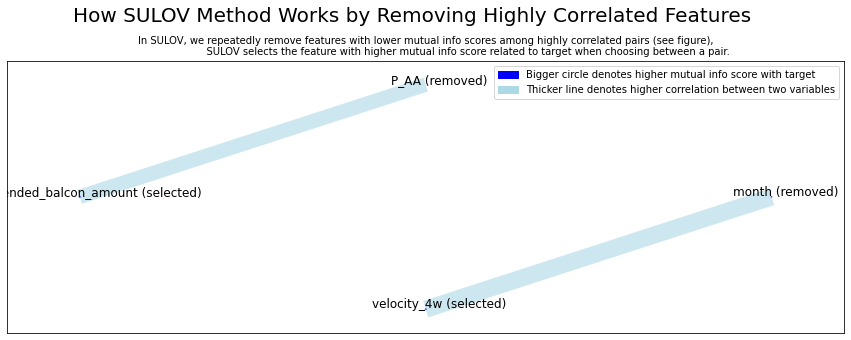

Time taken for SULOV method = 3 seconds
    Adding 0 categorical variables to reduced numeric variables  of 49
Finally 49 vars selected after SULOV
Converting all features to numeric before sending to XGBoost...
#######################################################################################
#####    R E C U R S I V E   X G B O O S T : F E A T U R E   S E L E C T I O N  #######
#######################################################################################
    using regular XGBoost
Current number of predictors before recursive XGBoost = 49 
    Taking top 7 features per iteration...
    XGBoost version using 1.7.3 as tree method: hist
Number of booster rounds = 20
        using 49 variables...
            selecting 18 features in this iteration
            Time taken for regular XGBoost feature selection = 16 seconds
        using 39 variables...
            selecting 15 features in this iteration
            Time taken for regular XGBoost feature selection = 14 seconds


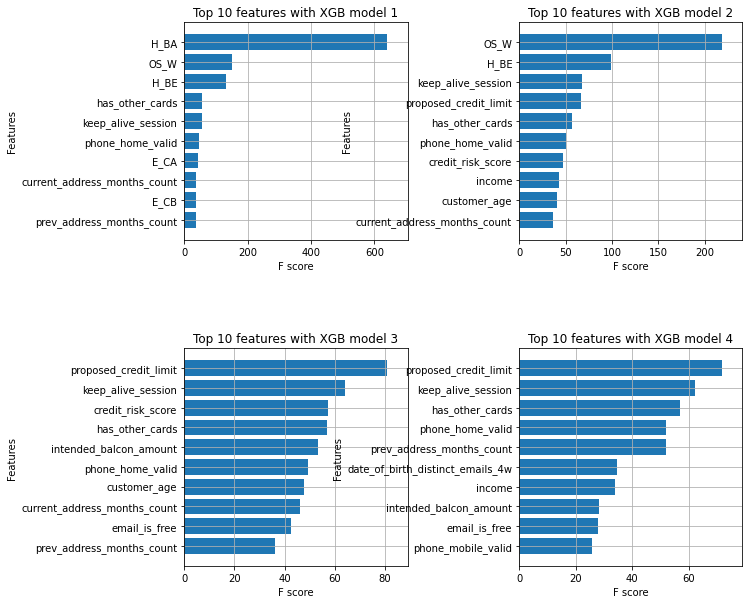

    Completed XGBoost feature selection in 2 seconds
#######################################################################################
#####          F E A T U R E   S E L E C T I O N   C O M P L E T E D            #######
#######################################################################################
Selected 20 important features:
['H_BA', 'OS_W', 'H_BE', 'has_other_cards', 'keep_alive_session', 'phone_home_valid', 'E_CA', 'current_address_months_count', 'E_CB', 'prev_address_months_count', 'bank_branch_count_8w', 'email_is_free', 'income', 'customer_age', 'proposed_credit_limit', 'name_email_similarity', 'H_BC', 'credit_risk_score', 'date_of_birth_distinct_emails_4w', 'intended_balcon_amount']
Total Time taken for featurewiz selection = 54 seconds
Output contains a list of 20 important features and a train dataframe


In [30]:
target = 'fraud_bool'
 
features, train = featurewiz(final_df, target, corr_limit=0.7, verbose=2, sep=",",
header=0,test_data="", feature_engg="", category_encoders="")

In [31]:
print(features)

['H_BA', 'OS_W', 'H_BE', 'has_other_cards', 'keep_alive_session', 'phone_home_valid', 'E_CA', 'current_address_months_count', 'E_CB', 'prev_address_months_count', 'bank_branch_count_8w', 'email_is_free', 'income', 'customer_age', 'proposed_credit_limit', 'name_email_similarity', 'H_BC', 'credit_risk_score', 'date_of_birth_distinct_emails_4w', 'intended_balcon_amount']


In [33]:
train.shape

(1000000, 21)

In [35]:
train.head(5)

,H_BA,OS_W,H_BE,has_other_cards,keep_alive_session,phone_home_valid,E_CA,current_address_months_count,E_CB,prev_address_months_count,bank_branch_count_8w,email_is_free,income,customer_age,proposed_credit_limit,name_email_similarity,H_BC,credit_risk_score,date_of_birth_distinct_emails_4w,intended_balcon_amount,fraud_bool
0,1.0,1.0,0.0,0,0,1,1.0,88,0.0,-1,1,0,0.9,50,500.0,0.166828,0.0,185,6,-1.331345,1
1,1.0,1.0,0.0,0,0,0,1.0,144,0.0,-1,718,1,0.9,50,1500.0,0.296286,0.0,259,3,-0.816224,1
2,1.0,0.0,0.0,0,0,0,0.0,132,1.0,-1,1,1,0.9,40,200.0,0.044985,0.0,177,14,-0.755728,1
3,1.0,0.0,0.0,1,0,0,1.0,22,0.0,-1,1921,1,0.9,50,200.0,0.159511,0.0,110,6,-1.205124,1
4,1.0,0.0,0.0,0,1,1,1.0,218,0.0,-1,1990,1,0.9,50,1500.0,0.596414,0.0,295,2,-0.773276,1


In [36]:
#split data into feature and target
X_new = train.drop(['fraud_bool'],axis=1)
 
y = train.fraud_bool.values

In [37]:
X_scaled =  StandardScaler().fit_transform(X_new)

In [38]:
X_train, X_valid, y_train, y_valid = train_test_split(X_scaled,y,test_size = 0.3, random_state=None)

In [39]:
classifier = LogisticRegression()
 
classifier.fit(X_train,y_train)

LogisticRegression()

In [40]:
# make prediction 
preds = classifier.predict(X_valid) 
# check performance
accuracy_score(preds,y_valid) 

0.9891266666666667